In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

[[ 0.13428861 -1.2666134 ]
 [-1.73364206 -2.39154865]
 [ 0.69380727 -1.01744303]
 ...
 [-1.44221428  0.54334831]
 [-0.64650029  1.38495779]
 [-3.28036787  0.7337371 ]]
(1500, 2)
[0 0 0 ... 2 2 2]
(1500,)


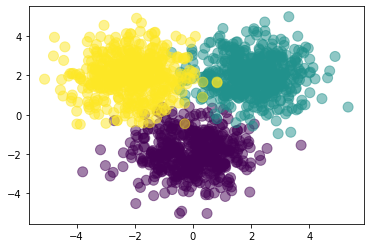

In [23]:
Nclass = 500
D = 2 #dimensions
M = 3 #hidden units
K = 3 # classes or labels
X1 = np.random.randn(Nclass,D)+np.array([0,-2])
X2 = np.random.randn(Nclass,D)+np.array([2,2])
X3 = np.random.randn(Nclass,D)+np.array([-2,2])
X = np.vstack([X1,X2,X3])
print(X)
print(X.shape)


#
Y = np.array([0]*Nclass+[1]*Nclass+[2]*Nclass)
print(Y)
print(Y.shape)



#Visualization
plt.scatter(X[:,0],X[:,1],c=Y,s=100,alpha =0.5)
plt.show()




In [24]:
N = len(Y)
T = np.zeros((N,K)) #Targets

#converting T into indicator values
for i in range(N):
    T[i,Y[i]]=1
    
    
    
    
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape,stddev = 0.01))


def forward(X,w1,b1,w2,b2):
    Z = tf.nn.sigmoid(tf.matmul(X,w1)+b1) #sigmoid activation function for hidden layer
    return tf.matmul(Z,w2)+b2 #output layer



#initialising tfx n tfy 
tfX = tf.placeholder(tf.float32,[None,D])
tfY = tf.placeholder(tf.float32,[None,K])

w1 = init_weights([D,M])
b1 = init_weights([M])
w2 = init_weights([M,K])
b2 = init_weights([K])

#probabilities 
logits = forward(tfX,w1,b1,w2,b2) 
print(logits)

#cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = tfY,logits = logits))


#optimizer
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

#predictions returns 1 on index which is having high value
predict_op = tf.argmax(logits,1) # 1= axis


#creating a session 
sess = tf.Session()
#initilazing values for tensorflow varibale
init = tf.global_variables_initializer()

sess.run(init)


for i in range(1000):
    sess.run(train_op,feed_dict = {tfX:X,tfY:T}) # X-inputs and T-targets
    pred = sess.run(predict_op,feed_dict = {tfX:X,tfY:T})
    if i%100 == 0:
        print("Accuracy",i,np.mean(Y==pred))





Tensor("add_9:0", shape=(?, 3), dtype=float32)
Accuracy 0 0.3333333333333333
Accuracy 100 0.3333333333333333
Accuracy 200 0.43733333333333335
Accuracy 300 0.898
Accuracy 400 0.964
Accuracy 500 0.9733333333333334
Accuracy 600 0.9726666666666667
Accuracy 700 0.9733333333333334
Accuracy 800 0.974
Accuracy 900 0.9733333333333334
